In [113]:
import numpy as np
from skimage import io, transform, color
from matplotlib import pyplot as plt

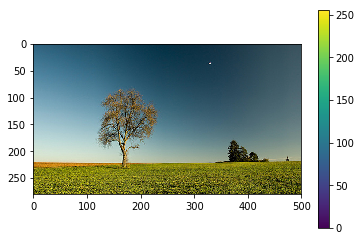

In [114]:
countryside = io.imread('countryside.jpg').astype(np.uint8)
countryside_copy = countryside.copy()
plt.imshow(countryside)
plt.colorbar()

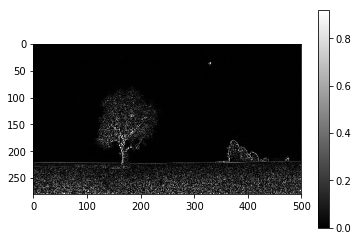

In [115]:
def gradient(img):
    gray_img = color.rgb2gray(img)
    M = np.array(gray_img).astype(np.float)
    gX,gY = np.gradient(M)
    return np.abs(gX)+np.abs(gY)

plt.imshow(gradient(countryside), cmap='gray')
plt.colorbar()

4.986381176470586 [5.19230216 4.98638118 5.06868471] (array([1]),)
4.923882941176469 [5.17991588 4.92388294 4.99911941] (array([1]),)
4.851628431372547 [5.13978    5.05892078 4.85162843] (array([2]),)
4.783896666666665 [4.91683667 4.95741784 4.78389667] (array([2]),)
4.622937450980391 [4.66464176 4.69899608 4.62293745] (array([2]),)
4.502462745098038 [4.50246275 4.88685176 4.87721235] (array([0]),)
4.326946862745097 [4.32694686 4.85838882 4.6760651 ] (array([0]),)
4.20751019607843 [4.2075102  4.91923216 4.55709706] (array([0]),)
4.1815390196078415 [4.18153902 4.76566588 4.63930451] (array([0]),)
4.137940980392155 [4.13794098 4.43410196 4.44369196] (array([0]),)
4.080722745098038 [4.08072275 4.34167725 4.26427627] (array([0]),)
3.9725370588235283 [3.97253706 4.18304706 4.12369216] (array([0]),)
3.9051335294117635 [3.90513353 3.98104725 4.07337235] (array([0]),)
3.7485094117647044 [3.86678843 3.74850941 4.00084255] (array([1]),)
3.67332450980392 [3.67332451 3.9980849  3.76177392] (array(

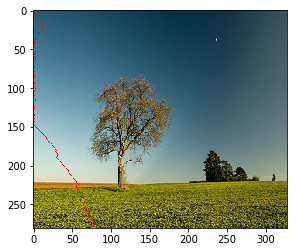

In [144]:
def markPath(mat, path, mark_as='red'):
    assert mark_as in ['red','green','blue','black','white']
    
    if len(mat.shape) == 2:
        mat = color.gray2rgb(mat)
    
    ret = np.zeros(mat.shape)
    ret[:,:,:] = mat[:,:,:]
    
    # Preprocess image
    if np.max(ret) < 1.1 or np.max(ret) > 256: # matrix is in float numbers
        ret -= np.min(ret)
        ret /= np.max(ret)
        ret *= 256
    
    # Determinate components
    if mark_as == 'red':
        r,g,b = 255,0,0
    elif mark_as == 'green':
        r,g,b = 0,255,0
    elif mark_as == 'blue':
        r,g,b = 0,0,255
    elif mark_as == 'white':
        r,g,b = 255,255,255
    elif mark_as == 'black':
        r,b,b = 0,0,0

    # Place R,G,B
    for i in path:
        ret[int(i[0]),int(i[1]),0] = r
        ret[int(i[0]),int(i[1]),1] = g
        ret[int(i[0]),int(i[1]),2] = b
    return ret.astype('uint8')

def backtracking(M):
    
    M2 = np.zeros((M.shape[0],2))
    
    minValRow = np.min(M[M.shape[0]-1,:])
    minValPos = np.where(minValRow==M[M.shape[0]-1,:])
    row,col = M.shape[0]-1,minValPos[0][0]
    counter = row
    while(counter!=-1):
        M2[row,0] = row
        M2[row,1] = col
        if(col==0):
            minValRow = min(M[row-1,col],M[row-1,col+1])
            minValPos = np.where(minValRow==M[row-1,col:col+2])
            row-=1
            col = col+minValPos[0][0]
        elif(col==M.shape[1]-1):
            minValRow = min(M[row-1,col],M[row-1,col-1])
            minValPos = np.where(minValRow==M[row-1,col-1:col+1])
            row-=1
            col = col+minValPos[0][0]
        else:
            minValRow = min(M[row-1,col],M[row-1,col-1],M[row-1,col+1])
            minValPos = np.where(minValRow==M[row-1,(col-1):(col+2)])
            print(minValRow, M[row-1,(col-1):(col+2)], minValPos)
            row-=1
            col = col+(minValPos[0][0]-1)
        counter-=1
    #print("backtracking M2: ", M2.shape)
    #print(M2)
    return M2

def lines(img):
    grad = gradient(img)
    size_X, size_Y = grad.shape
    M = np.zeros((size_X,size_Y))
    #print("Lines M:", M.shape)
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            if(i==0):
                M[i,j]=grad[i,j]
            else:
                if(j >= M.shape[1]-1):
                    M[i,j] = grad[i,j]+min(M[i-1,j-1],M[i-1,j])
                else:
                    M[i,j] = grad[i,j]+min(M[i-1,j-1],M[i-1,j],M[i-1,j+1])
                    
    return backtracking(M)

def generateIdx(idx_2d, n_col):
    idxs=[]    
    for i in idx_2d:
        idxs.append(i[0]*n_col+i[1])
    return idxs

def reduce(img,path):
    reducedImg = np.zeros((img.shape[0],img.shape[1]-1,img.shape[2]),dtype=np.uint8)
    #indexes = generateIdx(path,img.shape[1])
    for i in range(img.shape[2]):
        mask = np.ones_like(img[:,:,i],bool)
        for idx in path:
            mask[int(idx[0]),int(idx[1])] = False
        reducedImg[:,:,i] = img[:,:,i][mask].reshape(reducedImg.shape[0],reducedImg.shape[1])
    return reducedImg

plt.imshow(markPath(countryside, lines(countryside), mark_as='red'))

In [140]:
print(countryside_copy.shape)
for nlines in range(80):
    line_to_delete = lines(countryside)
    print(line_to_delete.size)
    #img_with_line = markPath(countryside, lines_to_delete, mark_as='red')
    countryside = reduce(countryside, line_to_delete)
    #plt.show()
    #plt.imshow(img_with_line)

(281, 500, 3)
562
562
562
562
562
562
562
562
562
562
562
562


IndexError: index 328 is out of bounds for axis 1 with size 328

(281, 341, 3)


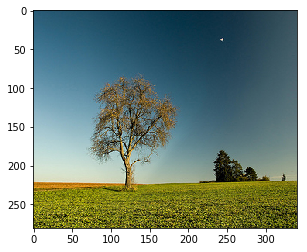

In [132]:
print(countryside.shape)
plt.imshow(countryside)
plt.show()

(281, 500, 3)


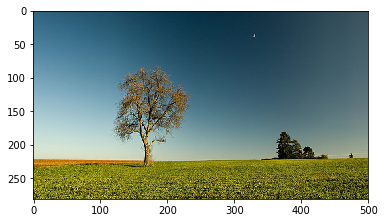

In [133]:
print(countryside_copy.shape)
plt.imshow(countryside_copy)
plt.show()